<a href="https://colab.research.google.com/github/Aartizikre150/DAb300/blob/main/Lab_2_Part_1_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Image preprocessing and using a fully connected neural network for image classification.

This lab will be done in two parts


> Indented block

*   Part 1 - Task 1 - 4
*   Part 2 - Task 5 & 6


---

In this lab, we will take our first steps toward running our code in the cloud. One of the simplest way to accomplish this is through Google's free (although, there is a paid Pro version) service, **Colab**.

This lab has 3 main tasks:

- **Task 1**: Get set up with Google Colab
- **Task 2**: Get the neural network you created in **Lab 1: Exercise 7** running without error in Google Colab
- **Task 3**: Preprocess images for use in Part 2 (20 Marks)
- **Task 4** **Viva** - Question will be based on Week 1 & 2 (Lectures & Labs) (10)

*** Viva will be conducted during Week 3 & 4 during yours Lab sessions**



## Task 1

To use **Colab**, you need to have a Google account. To get a free Google account, go the the [sign up](https://accounts.google.com/) and fill in the necessary information. If you already have a Google account, you can skip this step. (If you have a gmail address, then you already have a Google Account.)

!

Once you have an account, you will need to sign in. To do this, go to [google.com](https://google.com):

<img src="images/google_signin.png" width=600 align="center">

After you are signed in, navigate to [Google Colab](https://colab.research.google.com).

<img src="images/colab_intro.png" width=600 align="center">

From here, click on **New Notebook**, give the notebook a name and then **save** it. Now you should verify the folder structure in **Google Drive**. To do this, you should navigate back to [google.com](https://google.com), and select **Drive** from the menu at the top right:

<img src="images/drive.png" width=600 align="center">

Once you are in your Google Drive, you should have a folder structure identical to the following (the name you gave your notebook can be different):
<img src="images/colab_notebook_save.png" width=600 align="center">

## Task 2

Following the procedure outlined in Lab 1, reproduce the code created in Exercise 7 in Google Colab. Verify that you get similar results using the same MNIST data that you used for Lab 1.

To upload the Lab 1 file (or any other file) to your Google Drive, simply click on the **New** button in the top left, and then selct **File upload**:

<img src="images/lab_upload.png" width=600 align="center">


### Extra Computational Power

One reason to use Google Colab is because it offers extra computational power in the form of access to GPUs for training larger models. As this is a free service, the extra compute resources come with some limitations (see Resource Limits section in the [FAQ](https://research.google.com/colaboratory/faq.html)). To access these extra compute resources, select the **Runtime** tab:

<img src="images/runtime_1.png" width=600 align="center">

Then select **Change runtime type**, choose **GPU** from the drop-down menu, and click **Save**:

<img src="images/runtime_2.png" width=600 align="center">

Now, when you run code in that notebook, it can run on GPUs instead of CPUs.

In [68]:
!pip install tensorflow

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 485386 (1.85 MB)
Trainable params: 48538

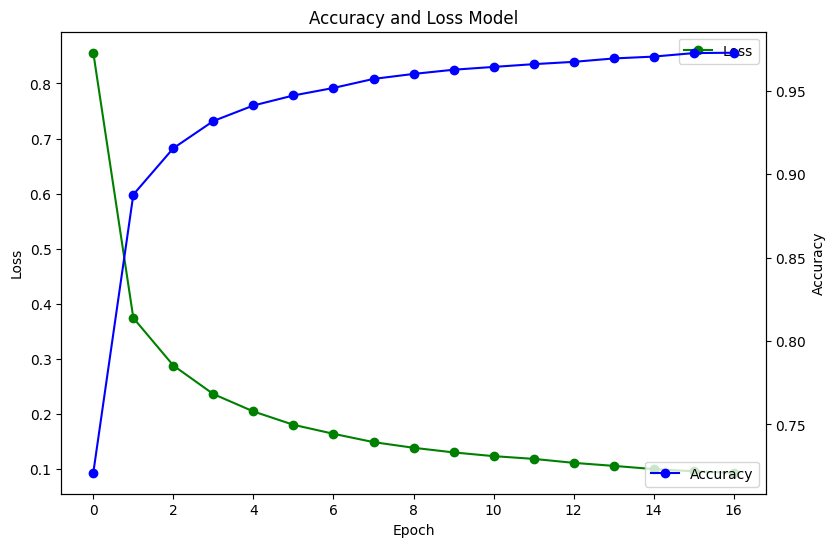

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9775
test_acc: 0.9775000214576721
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9869
train_acc: 0.9868500232696533


In [70]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network7 = Sequential()
network7.add(Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
# Added a Dropout layer with a specified dropout rate
network7.add(Dropout(0.5))
network7.add(Dense(128, activation='sigmoid'))
network7.add(Dense(128, activation='relu'))
# Added a Dropout layer with a specified dropout rate
network7.add(Dropout(0.5))
network7.add(Dense(10, activation='softmax')) # Multi clasiification problem

network7.summary()

network7.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network7.fit(train_images, train_labels, epochs=17, batch_size=128, verbose=1)

import matplotlib.pyplot as plt
# Plot training history
def plot_training_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'o-', color='green')
    plt.title('Accuracy and Loss Model')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Loss'], loc='upper right')

    # Plot training & validation accuracy values
    plt.twinx()
    plt.plot(history.history['accuracy'], 'o-',color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Accuracy'], loc='lower right')

    plt.show()

plot_training_history(history)

test_loss, test_acc = network7.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

train_loss, train_acc = network7.evaluate(train_images, train_labels)
print('train_acc:', train_acc)

## Task 3

The first step here is to upload the **Lego_small** data ([source](https://www.kaggle.com/joosthazelzet/lego-brick-images) that was provided with this notebook. (**Do not use the data from the *source* link.**) To do this, just upload the entire folder to your Google Drive. When you have done that you should have a folder structure that looks something like this:

<img src="images/lab_upload_lego.png" width=600 align="center">

To have access to the data in your Google Drive, you will need to run the following code to 'mount' your Drive so it is accessible to the notebook you are running on Google Colab. When you run the code, following the instructions so that your notebook can access the data.

In [41]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, you need to convert the images you just uploaded into a data structure similar to the MNIST data from Lab 1. The number of images and the pixel dimensions are, however, different than the MNIST data.

**The goal here is to get the data into the correct shape so that you can use it with a fully connected neural network.**

To accomplish this task, you will need to:
 - load the images from the various folders of the provided data
 - make sure they are grayscale and not RGB
 - convert the images to NumPy arrays
 - resize any images that are not the correct size
 - store these arrays in the proper shape in an appropriate data structure
 - create a target array to keep track of the proper class of each image in your data
 - view a few images after processing to verify that everything is working as it should
 - convert image arrays to one-dimensional and scale the pixel values so they are between 0 and 1
 - verify the images and target arrays have the correct dimensions
 - convert string labels to integers

Aside from the packages imported below, you may find the following helpful to process the images properly:
 - [info](https://realpython.com/python-pathlib/) on `Path` so you know how to create a path to the images
 - the `.name` method that can the file or directory name from a `Path` object
 - the `.reshape()` method
 - the `.append()` method

**Note that not all of the tasks above have starter code below, so be sure you have completed all tasks.**

In [42]:
!pip install tensorflow

In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import cv2

Fill in the missing elements of the starter code below.

In [50]:
p = Path().cwd()
q =  p/('/content/drive/MyDrive/DAB300/Lego_smal/Lego_small') # None # use p to create a path to the data

target_dict = {
    'brick 1x2' : 0,
    'brick 2x2' : 1,
    'brick 2x4' : 2,
    'plate 1x2' : 3,
    'plate 2x2' : 4,
    'plate 2x4' : 5,
 } # create dictionary mapping Lego block type to integer label

images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir():
    current_label = fldr.name  # get the name of the current label and map it to the integer label
    label = target_dict.get(current_label, -1)
    for img in fldr.iterdir():
        img = cv2.imread(str(img), cv2.IMREAD_GRAYSCALE)  # Load a grayscale image
        img_array = np.array(img) # convert the image to an NumPy array
        img_array_resized = cv2.resize(img, (128, 128))  # Resize the image to 128x128
        img_array_reshaped = img_array_resized.reshape(128, 128, 1) # reshape the image from (128, 128, 1) to (128, 128)
        images.append(img_array_reshaped) # add reshaped image to list of images
        labels.append(label) #  Add label for this image to the list of labels

images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array

5


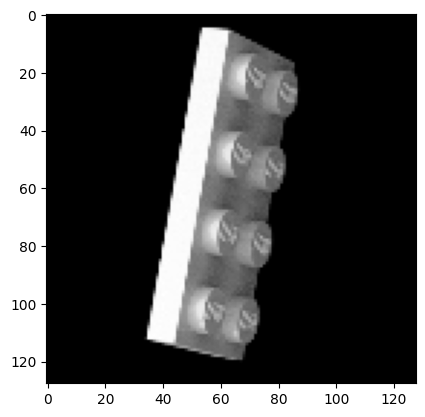

In [60]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(images[0], cmap='gray')
print(labels[0])


1


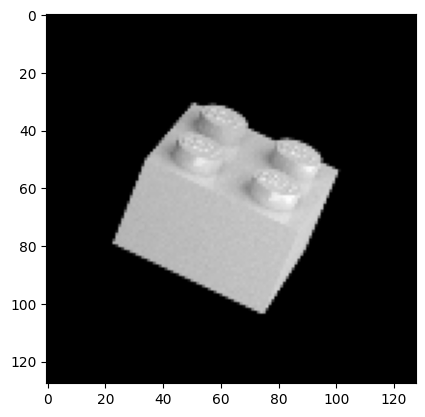

In [61]:
plt.imshow(images[1998], cmap='gray')
print(labels[1998])

1


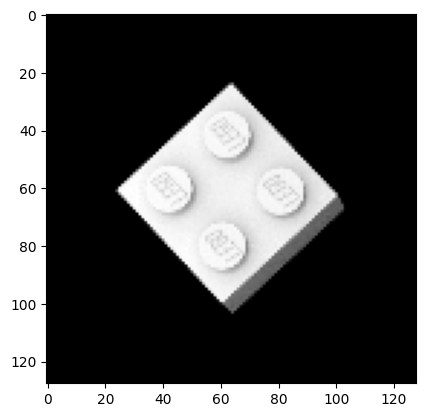

In [62]:
plt.imshow(images[1962], cmap='gray')
print(labels[1962])

**Answer the following questions briefly**

**1. Why do you convert all the images to same dimensions?**

Resizing images to a uniform 128x128 pixel dimensions is a common machine learning preprocessing step:

1.   Ensures consistency for neural network inputs.
2.   Enhances computational efficiency.
3.   Simplifies neural network design.


**2. Why do you reshape the images?**

Reshaping the images is essential to match the expected input shape of the neural network. In this case, the images are reshaped from (128, 128, 1) to (128, 128), which means they are flattened from a 3D array to a 2D array. This reshaping is done because many neural network architectures, especially fully connected (dense) layers, expect 2D input arrays. Each pixel in the image becomes a feature, and the flattened image can be treated as a 1D vector.



**3. Based on the images and labels obtained after all of the above preprocessing steps, how many neurons will be created in the input and output layers for the fully linked network that you will construct in Lab 2 - Part 2?**


Input Layer: The input layer will have as many neurons as there are features in the flattened image. In this case, since the images are resized to 128x128 pixels and are grayscale, the input layer will have  **128 * 128 = 16,384** neurons.

Output Layer: The output layer will have as many neurons as there are unique classes in your dataset. From the target_dict, it appears that there are 6 **unique classes (0 to 5)**, so the output layer will have **6** neurons, each representing a class label.




